In [1]:
import tensorflow as tf
import utils
import train
import samplers
import models
import inpaint
import visualize
import numpy as np
import matplotlib.pyplot as plt

## Train VAE

In [2]:
'''data_path  = '../../data/mnist.npy'
model_spec = '../model_specs/vae.json'
model = train.train(data_path, model_spec, epochs=100)
model.plot_sample()'''

"data_path  = '../../data/mnist.npy'\nmodel_spec = '../model_specs/vae.json'\nmodel = train.train(data_path, model_spec, epochs=100)\nmodel.plot_sample()"

## Inpaint with Langevin dynamics

In [ ]:
gen_path = '../data/saved_models/vae_basic_test_generative_net.h5'
test_path = '../data/datasets/test/mnist_single.npy'
inpaint_spec_path = '../inpaint_specs/test_spec.json'
samples = inpaint.inpaint(gen_path,inpaint_spec_path,test_path,save=True,iterations=20000,use_metropolis=True,
                          noise_sd=0.1,n_samples=400,noise_decay=1.0)
sample_images = tf.sigmoid(samples).numpy()

Loss: 23.456443786621094:   8%|▊         | 1516/20000 [10:07<2:04:37,  2.47it/s]

## Save inpainting progress GIF

In [15]:
samples_path= '../data/samples/vae_langevin.npy'
np.save(samples_path,sample_images.squeeze())
visualize.samples2gif(samples_path,'../data/visualizations/vae_langevin.gif',10,10,fps=5)

100%|██████████| 250/250 [00:07<00:00, 31.63it/s]


In [17]:
! chmod 777 ../data/visualizations/

In [5]:
def replace_batch_with_masked(mask_single,image_batch):
    assert len(mask_single.shape) == 4
    assert len(image_batch.shape) == 4
    
    batch_size = image_batch.shape[0]
    
    # This array is zero for all pixels that are to be replaced
    # Pixels are replaced if their mask is zero in the original
    # masked array
    is_kept = np.repeat(mask_single.mask,batch_size , axis=0)
    
    # Zero out all the pixels that are NOT masked in the test data
    new_batch = image_batch * is_kept
    
    single_with_zeros = mask_single.data * (1-mask_single.mask)
    repeated_single = np.repeat(single_with_zeros,batch_size,axis=0)
    return new_batch + repeated_single

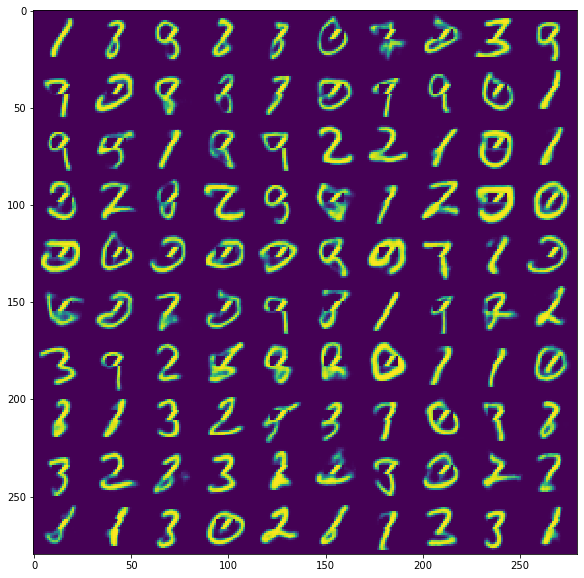

In [7]:
masked_image = np.load(test_path,allow_pickle=True)
batch = sample_images[-1,:,...]

replaced = replace_batch_with_masked(masked_image,batch)
plt.figure(figsize=(10,10))
plt.imshow(utils.flatten_image_batch(replaced,10,10))

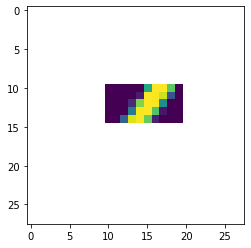

In [15]:
plt.imshow(np.squeeze(np.load(test_path,allow_pickle=True)))

In [4]:
x = tf.sigmoid(samples).numpy()

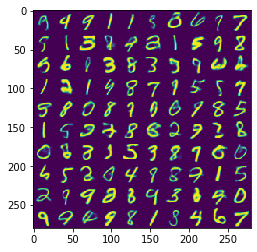

In [5]:
import matplotlib.pyplot as plt
plt.imshow(utils.flatten_image_batch(x[-1],10,10))

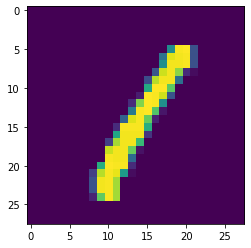

In [6]:
data = np.load('../../data/mnist.npy')
test_path =  '../data/datasets/test/mnist_single.npy'
single = utils.norm_zero_one(data[3:4])
plt.imshow(single.squeeze())
mask = np.ones_like(single)
mask[:,10:15,10:20,:] = 0
mask_image = np.ma.masked_array(data=single,mask=mask)
plt.imshow(np.squeeze(mask_image))

mask_image.dump(test_path)

(array([695.,   7.,   8.,   4.,   4.,   2.,   4.,   5.,   8.,  47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

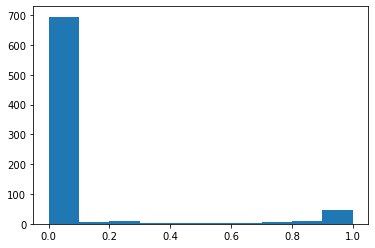

In [7]:
plt.hist(mask_image.data.ravel())

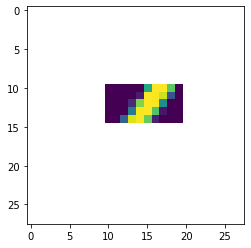

In [8]:
import numpy as np 
test = np.load(test_path, allow_pickle=True)
plt.imshow(np.squeeze(test))

## Tests

In [9]:
def test_vae_train(data_path='../../data/mnist.npy',model_spec = '../model_specs/vae.json'):
    model = train.train(data_path,model_spec,epochs=1)
    
def test_gan_train(data_path='../../data/mnist.npy',model_spec = '../model_specs/gan.json'):
    model = train.train(data_path,model_spec,epochs=1)
    
def check_json_specs(root_dir='..'):
    utils.check_json_valid(root_dir=root_dir)

tests = [test_vae_train,
        test_gan_train,
        check_json_specs]

[test() for test in tests]

Loss=103.614:   0%|          | 0/1 [00:06<?, ?it/s]

KeyboardInterrupt: 